In [1]:
import numpy as np
import seaborn as sns

In [2]:
def DTW_TF(S, S1, d=tf.math.subtract):
    n = max(S.shape[0]+1, S1.shape[0]+1)
    cost_matrix = []
    cost_mat = np.full((S.shape[0]+1, S1.shape[0]+1), 123456789)
    cost_matrix.append([0, *([123456789] * S1.shape[0])])
    for i in range(1,S.shape[0]+1):
        sub_cost_j = [123456789]
        for j in range(1, len(S1)+1):
            dst = abs(S[i-1] - S1[j-1])
            mat_dt = [
            dst + sub_cost_j[j-1],
            dst + cost_matrix[i-1][j-1],
            dst + cost_matrix[i-1][j]
            ]
            sub_cost_j.append(tf.reduce_min(mat_dt))
        cost_matrix.append(tf.stack(sub_cost_j))
    return tf.stack(cost_matrix), 1

NameError: name 'tf' is not defined

In [8]:
def DTW(S, S1):
    n = max(len(S)+1, len(S1)+1)
    cost_mat = np.full((len(S)+1,len(S1)+1), np.inf)
    cost_mat[0, 0] = 0
    for i in range(1,len(S)+1):
        for j in range(1, len(S1)+1):
            dst = abs(S[i-1] - S1[j-1])
            mat_dt = [
            dst + cost_mat[i, j-1],
            dst + cost_mat[i-1, j-1],
            dst + cost_mat[i-1, j]
            ]
            cost_mat[i, j] = min(mat_dt)
    return cost_mat

def DTW_minimal_path(cost_mat):
    i,j = np.array(cost_mat.shape) - 1
    print(i)
    cost = cost_mat[i, j]
    path=[(i-1,j-1)]
    while (i != 0) & (j != 0):
        cost_min = np.array([
            cost_mat[i-1, j-1],
            cost_mat[i, j-1],
            cost_mat[i-1, j]
            ])
        print(cost_min)
        n_min = int(np.argmin(cost_min))
        if n_min == 0:
            path.append((i-2,j-2))
            i += -1
            j += -1
        elif  n_min == 1:
            path.append((i-1,j-2))
            j += -1
        elif  n_min == 2:
            path.append((i-2,j-1))
            i += -1
    return path[:-1], cost

        
        
        
        
            

In [9]:
S = [1, 3, 3, 3,2, 0, 0, 1]
S1 = [0, 1, 3, 2, 2, 0, 1]



cost_mat_0 = DTW(S, S)
print(cost_mat_0)
np.array(DTW_minimal_path(cost_mat_0)[0]).shape

[[ 0. inf inf inf inf inf inf inf inf]
 [inf  0.  2.  4.  6.  7.  8.  9.  9.]
 [inf  2.  0.  0.  0.  1.  4.  7.  9.]
 [inf  4.  0.  0.  0.  1.  4.  7.  9.]
 [inf  6.  0.  0.  0.  1.  4.  7.  9.]
 [inf  7.  1.  1.  1.  0.  2.  4.  5.]
 [inf  8.  4.  4.  4.  2.  0.  0.  1.]
 [inf  9.  7.  7.  7.  4.  0.  0.  1.]
 [inf  9.  9.  9.  9.  5.  1.  1.  0.]]
8
[0. 1. 1.]
[0. 0. 0.]
[0. 2. 2.]
[0. 1. 1.]
[0. 0. 0.]
[0. 0. 0.]
[0. 2. 2.]
[ 0. inf inf]


(8, 2)

In [10]:
DTW(S, S1)

cost_mat_1 = DTW(S, S1)
print(cost_mat_1)
min_path, cost = DTW_minimal_path(cost_mat_1)
print(min_path, cost)

[[ 0. inf inf inf inf inf inf inf]
 [inf  1.  1.  3.  4.  5.  6.  6.]
 [inf  4.  3.  1.  2.  3.  6.  8.]
 [inf  7.  5.  1.  2.  3.  6.  8.]
 [inf 10.  7.  1.  2.  3.  6.  8.]
 [inf 12.  8.  2.  1.  1.  3.  4.]
 [inf 12.  9.  5.  3.  3.  1.  2.]
 [inf 12. 10.  8.  5.  5.  1.  2.]
 [inf 13. 10. 10.  6.  6.  2.  1.]]
8
[1. 2. 2.]
[3. 5. 1.]
[1. 3. 3.]
[2. 1. 3.]
[1. 2. 2.]
[5. 7. 1.]
[3. 5. 1.]
[1. 3. 3.]
[inf  1. inf]
[ 0. inf inf]
[(7, 6), (6, 5), (5, 5), (4, 4), (4, 3), (3, 2), (2, 2), (1, 2), (0, 1), (0, 0)] 1.0


In [17]:
from dtaidistance import dtw

distance = dtw.distance(S, S1)
print(distance)
print(dtw.warping_path(S, S1))

1.0
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 3), (4, 4), (5, 5), (6, 5), (7, 6)]


In [16]:
print(min_path[::-1])

[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 3), (4, 4), (5, 5), (6, 5), (7, 6)]


<AxesSubplot:>

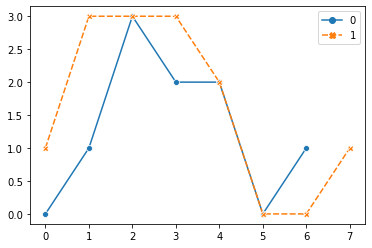

In [319]:
sns.lineplot(
   data = [S1, S], markers = True
)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

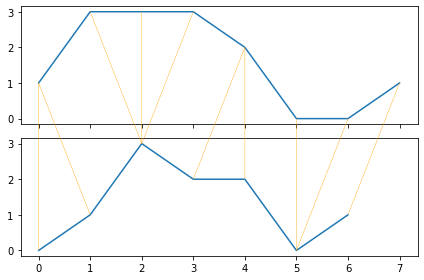

In [18]:
from dtaidistance import dtw_visualisation as dtwvis

path = dtw.warping_path(S, S1)
dtwvis.plot_warping(S, S1, path)

<AxesSubplot:>

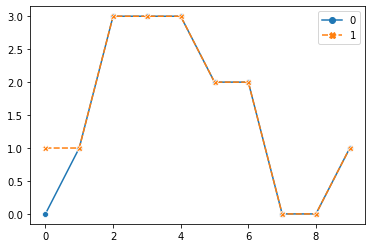

In [320]:
S1_transform, S_transform = zip(*[(S1[ij[1]], S[ij[0]])  for ij in min_path[::-1]])

sns.lineplot(
   data = [S1_transform, S_transform], markers = True
)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv1D
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import pandas as pd
from dtaidistance import dtw

In [15]:
y = tf.constant([-5, 4, 3, 2, 1])
abs(2 + y)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([3, 6, 5, 4, 3])>

In [1]:

i =1
S = tf.convert_to_tensor(S)
S1 = tf.convert_to_tensor(S1)

dst = abs(S[i-1] - 0)

DTW_TF(S, S1, 1)

NameError: name 'tf' is not defined

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.
